In [13]:
from sklearn.datasets import make_moons

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [75]:
x,y = make_moons(n_samples=500, noise = 0.3, random_state=42)

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

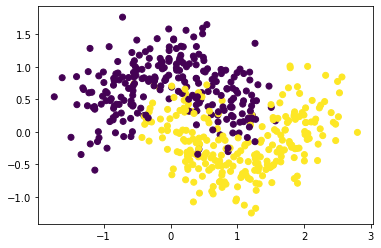

In [77]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.show()

In [78]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svc_clf = SVC(probability=True,random_state=42)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [81]:
voting_clf = VotingClassifier(estimators=[('lr',log_clf),('sv',svc_clf),('dt', dt_clf)], voting='soft')

In [84]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('sv',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  deci...
                              DecisionTreeClassifier(ccp_alpha=0.0,
       

In [85]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,svc_clf,dt_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.85
SVC 0.87
DecisionTreeClassifier 0.82
VotingClassifier 0.86
